In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace

from quickstats.plots import UpperLimit1DPlot
from quickstats.plots import UpperLimit2DPlot
from quickstats.plots import Likelihood2DPlot, UpperLimit3DPlot
from quickstats.utils.common_utils import combine_dict
from quickstats.maths.interpolation import get_intersections
from quickstats.components import AnalysisObject, ExtendedModel, ExtendedMinimizer


ImportError: cannot import name 'get_intersections' from 'quickstats.maths.interpolation' (/afs/cern.ch/user/z/zhangr/work/HHcomb/DarkPhotonCombination/submodules/quickstats/quickstats/maths/interpolation.py)

<a id="section-toc"></a>
### Table of Contents
- [Check limit results](#section-limit-results)
- [Discriminant plot](#section-plot)


<a id="check-limit-results"></a>
# Check limit results
[back to ToC](#section-toc)

In [3]:
basedir = os.environ['basedir']
def json_to_google(input_json):
    df = pd.read_json(input_json)
    return df

In [12]:
version = 'v2'
channel = 'combined/A-VBF_ZH-nocorr'
input_json = os.path.join(basedir, f'output/{version}/limits/{channel}/limits.json')
df = json_to_google(input_json)

In [13]:
cols = ['mass', 'obs', '0', '-2', '-1', '1', '2']
df[cols].set_index('mass')

obs         0        -2        -1         1         2
mass                                                            
0     0.013505  0.014571  0.007821  0.010499  0.020801  0.028161

<a id="section-plot"></a>
# Discriminat plots
[back to ToC](#section-toc)

In [33]:
!quickstats inspect_ws -i /eos/user/n/nkvu/VBF_Hyyd_mH600_myd0_syst/limit_files/results/outHFBkgPlusSignal/VBFHinv_combined_NormalMeasurement_model.root


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

Workspace:
	combined
Datasets (2):
	asimovData
	obsData
Snapshots (1):
	NominalParamValues
Categories (50):
	SR10_cuts (observable = obs_x_SR10_cuts, range = [0.5, 1.5], bins = 1)
	SR1_cuts (observable = obs_x_SR1_cuts, range = [0.5, 1.5], bins = 1)
	SR2_cuts (observable = obs_x_SR2_cuts, range = [0.5, 1.5], bins = 1)
	SR3_cuts (observable = obs_x_SR3_cuts, range = [0.5, 1.5], bins = 1)
	SR4_cuts (observable = obs_x_SR4_cuts, range = [0.5, 1.5], bins = 1)
	SR5_cuts (observable = obs_x_SR5_cuts, range = [0.5, 1.5], bins = 1)
	SR6_cuts (observable = obs_x_SR6_cuts, range = [0.5, 1.5], bins = 1)
	SR7_cuts (observable = obs_x_SR7_cuts, range = [0.5, 1.5], bins = 1)
	SR8_cuts (observable = obs_x_SR8_cuts, range = [0.5, 1.5], bins = 1)
	SR9_cuts

In [34]:
workspace_file = '/eos/user/n/nkvu/VBF_Hyyd_mH600_myd0_syst/limit_files/results/outHFBkgPlusSignal/VBFHinv_combined_NormalMeasurement_model.root'
model = ExtendedModel(workspace_file, data_name="obsData")


[INFO] Opening file "/eos/user/n/nkvu/VBF_Hyyd_mH600_myd0_syst/limit_files/results/outHFBkgPlusSignal/VBFHinv_combined_NormalMeasurement_model.root"
[INFO] Loaded workspace "combined"
[INFO] Loaded model config "ModelConfig"
[INFO] Activated binned likelihood attribute for SR10_cuts_model
[INFO] Activated binned likelihood attribute for SR1_cuts_model
[INFO] Activated binned likelihood attribute for SR2_cuts_model
[INFO] Activated binned likelihood attribute for SR3_cuts_model
[INFO] Activated binned likelihood attribute for SR4_cuts_model
[INFO] Activated binned likelihood attribute for SR5_cuts_model
[INFO] Activated binned likelihood attribute for SR6_cuts_model
[INFO] Activated binned likelihood attribute for SR7_cuts_model
[INFO] Activated binned likelihood attribute for SR8_cuts_model
[INFO] Activated binned likelihood attribute for SR9_cuts_model
[INFO] Activated binned likelihood attribute for oneEleCR10_cuts_model
[INFO] Activated binned likelihood attribute for oneEleCR1_cuts

In [32]:
model.print_summary()

Workspace:
	combWS
Datasets (2):
	asimovData
	combData
Snapshots (0):
Categories (50):
	SR10_cuts (observable = obs_x_SR10_cuts, range = [0.5, 1.5], bins = 1)
	SR1_cuts (observable = obs_x_SR1_cuts, range = [0.5, 1.5], bins = 1)
	SR2_cuts (observable = obs_x_SR2_cuts, range = [0.5, 1.5], bins = 1)
	SR3_cuts (observable = obs_x_SR3_cuts, range = [0.5, 1.5], bins = 1)
	SR4_cuts (observable = obs_x_SR4_cuts, range = [0.5, 1.5], bins = 1)
	SR5_cuts (observable = obs_x_SR5_cuts, range = [0.5, 1.5], bins = 1)
	SR6_cuts (observable = obs_x_SR6_cuts, range = [0.5, 1.5], bins = 1)
	SR7_cuts (observable = obs_x_SR7_cuts, range = [0.5, 1.5], bins = 1)
	SR8_cuts (observable = obs_x_SR8_cuts, range = [0.5, 1.5], bins = 1)
	SR9_cuts (observable = obs_x_SR9_cuts, range = [0.5, 1.5], bins = 1)
	oneEleCR10_cuts (observable = obs_x_oneEleCR10_cuts, range = [0.5, 1.5], bins = 1)
	oneEleCR1_cuts (observable = obs_x_oneEleCR1_cuts, range = [0.5, 1.5], bins = 1)
	oneEleCR2_cuts (observable = obs_x_oneEleCR2

In [44]:
# for i in model.pois:
#     print(i.get_name())
    
dir(model.get_poi('mu_SIG')) #.set_value(1000)

['AClean',
 'ADirty',
 'AbstractMethod',
 'Activate',
 'Always',
 'AppendPad',
 'Auto',
 'Browse',
 'CheckedHash',
 'Class',
 'ClassName',
 'Class_Name',
 'Class_Version',
 'Clear',
 'Clone',
 'CollectErrors',
 'Compare',
 'ConfigChange',
 'Copy',
 'CountErrors',
 'DeActivate',
 'DeclFileLine',
 'DeclFileName',
 'Delete',
 'Dictionary',
 'DistancetoPrimitive',
 'Draw',
 'DrawClass',
 'DrawClone',
 'Dump',
 'Error',
 'Execute',
 'ExecuteEvent',
 'Fatal',
 'FillBuffer',
 'FindObject',
 'GetDrawOption',
 'GetDtorOnly',
 'GetIconName',
 'GetName',
 'GetObjectInfo',
 'GetObjectStat',
 'GetOption',
 'GetTitle',
 'GetUniqueID',
 'HandleTimer',
 'HasInconsistentHash',
 'Hash',
 'Ignore',
 'ImplFileLine',
 'ImplFileName',
 'Info',
 'InheritsFrom',
 'Inspect',
 'InvertBit',
 'IsA',
 'IsDestructed',
 'IsEqual',
 'IsFolder',
 'IsOnHeap',
 'IsSortable',
 'IsZombie',
 'MayNotUse',
 'Never',
 'NotAdvised',
 'Notify',
 'NumEvent',
 'Obsolete',
 'Paint',
 'Pop',
 'Print',
 'PrintErrors',
 'Raw',
 'Read

/afs/cern.ch/user/z/zhangr/work/HHcomb/DarkPhotonCombination/submodules/quickstats/quickstats/plots/template.py:229: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, **styles['figure'])


<Figure size 432x288 with 0 Axes>

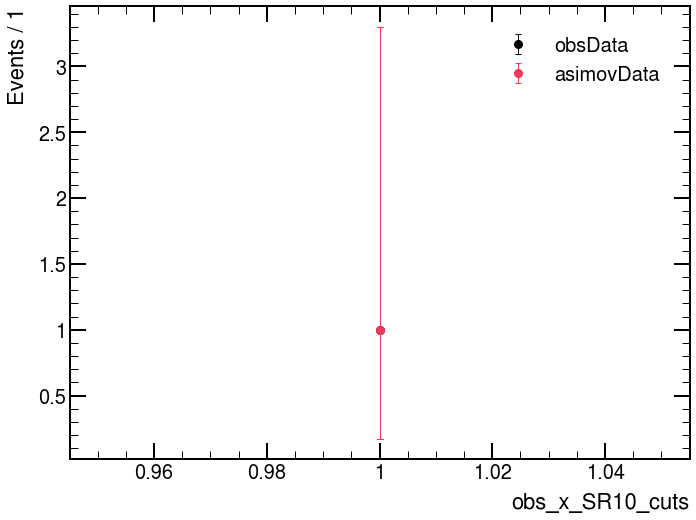

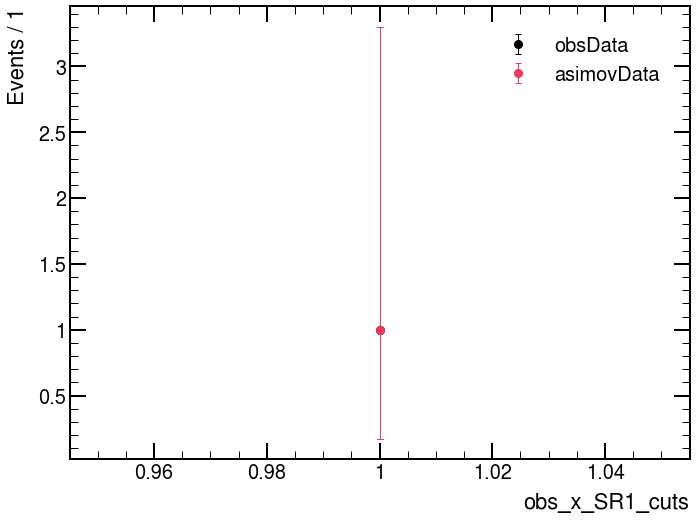

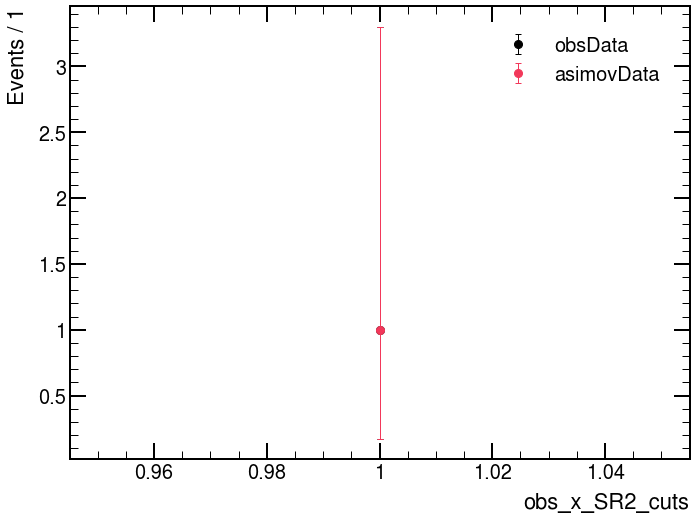

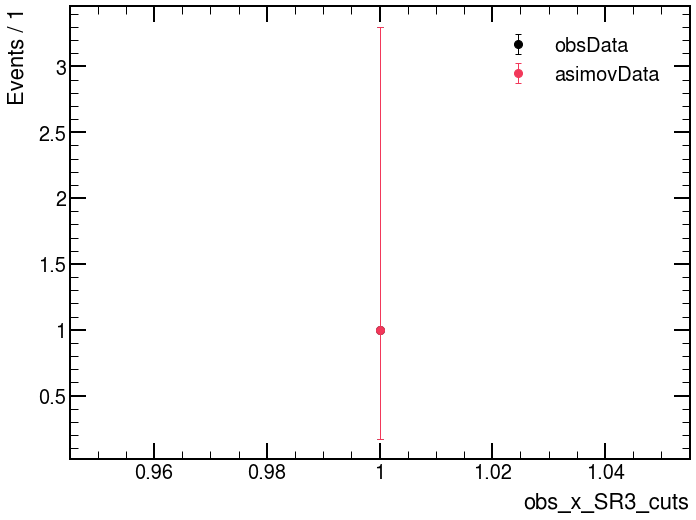

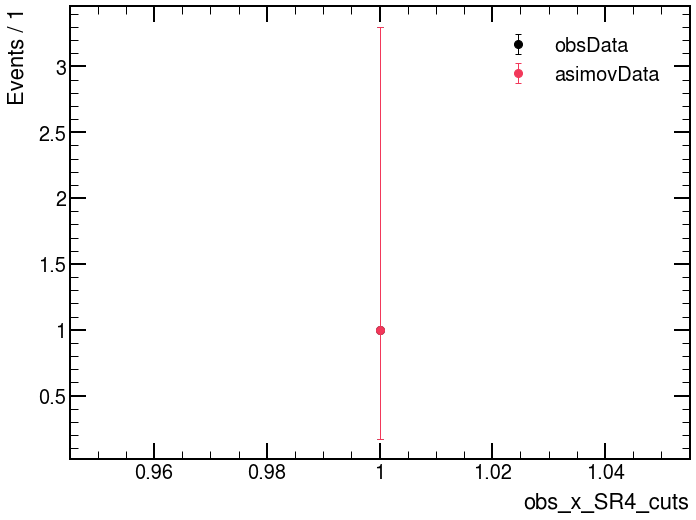

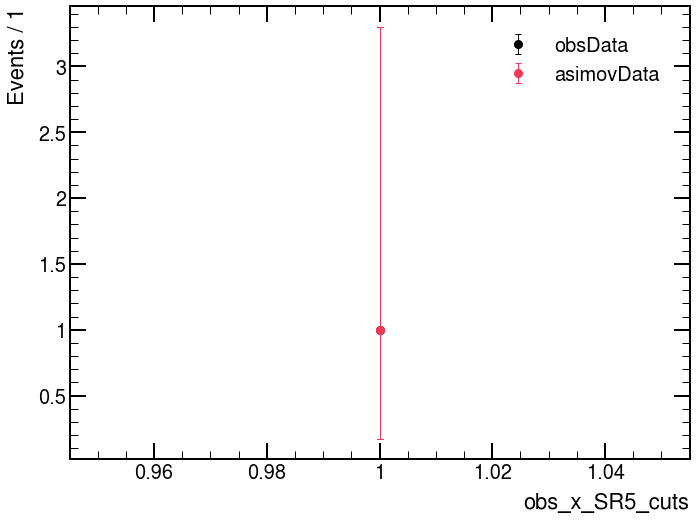

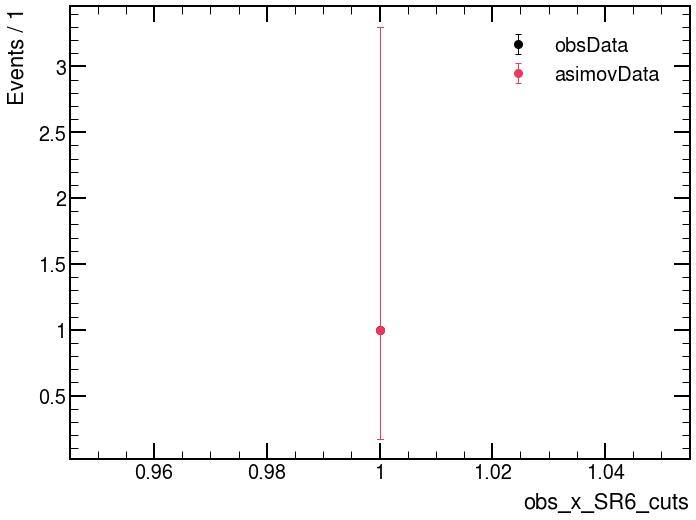

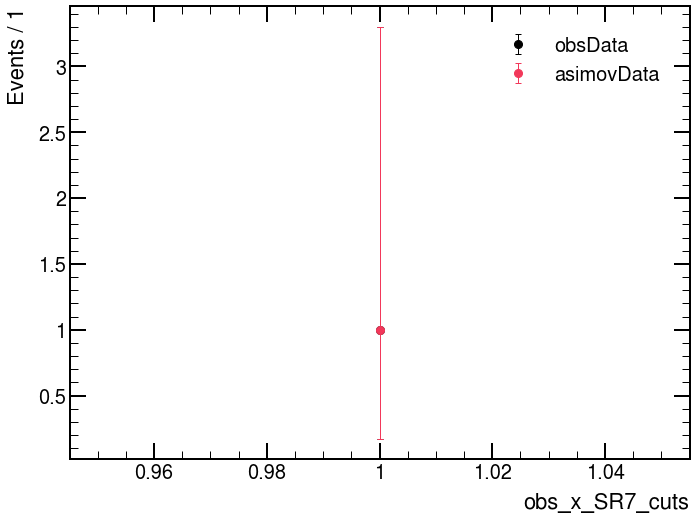

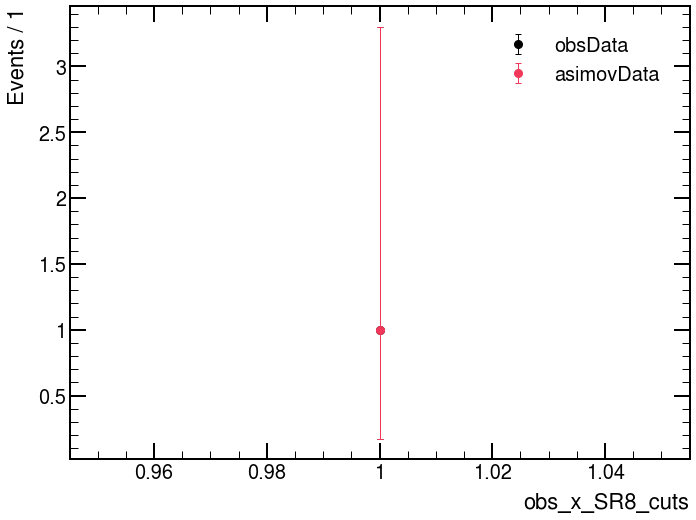

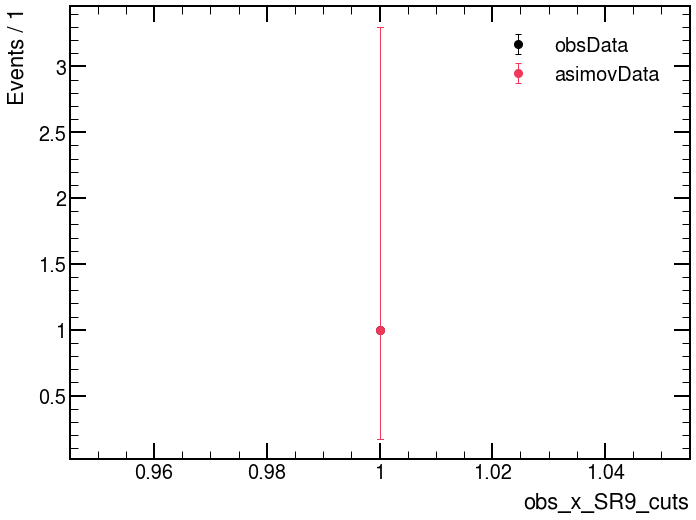

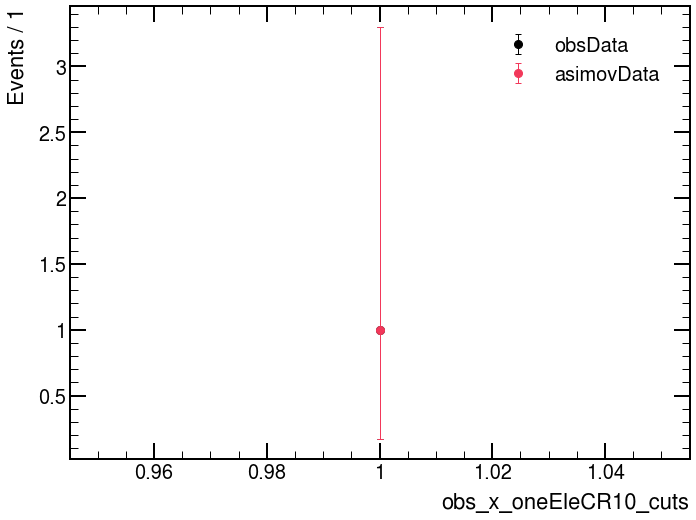

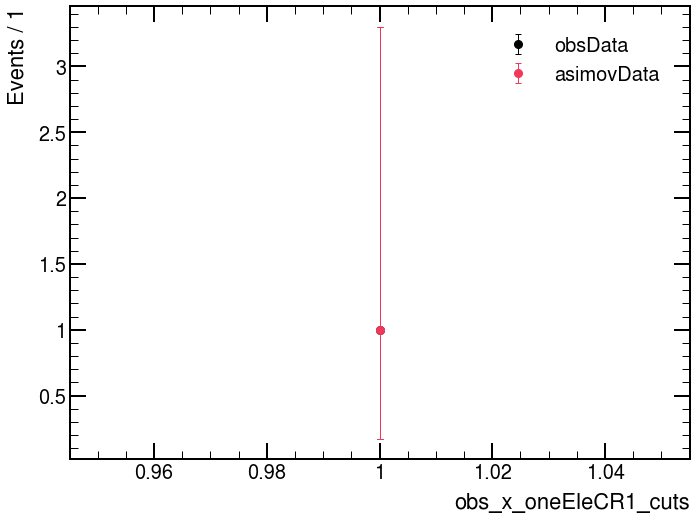

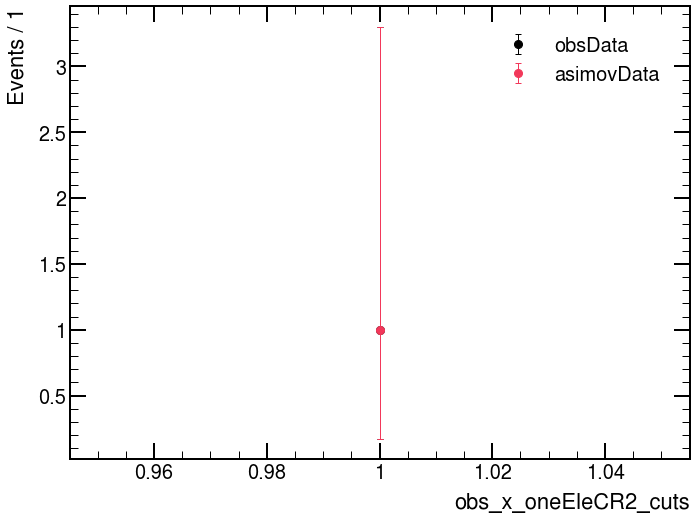

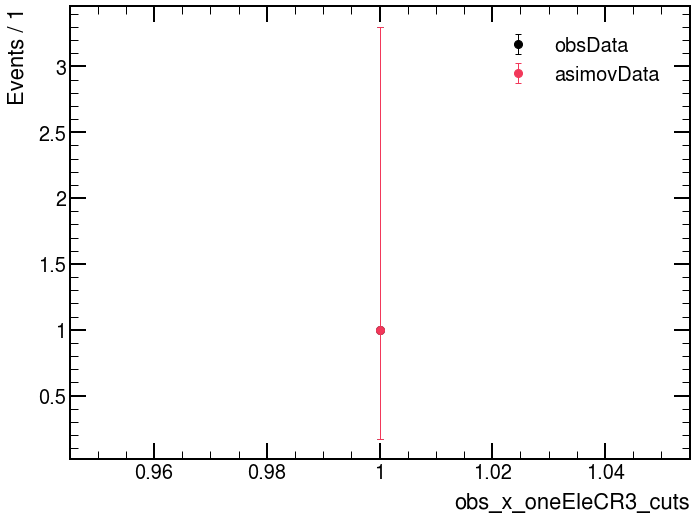

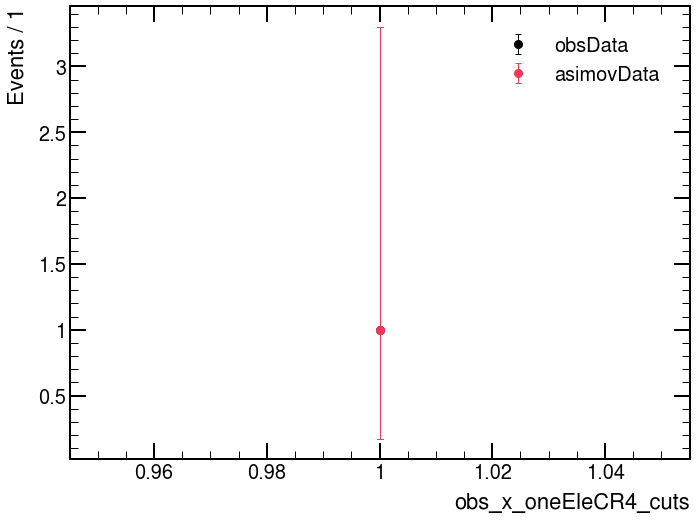

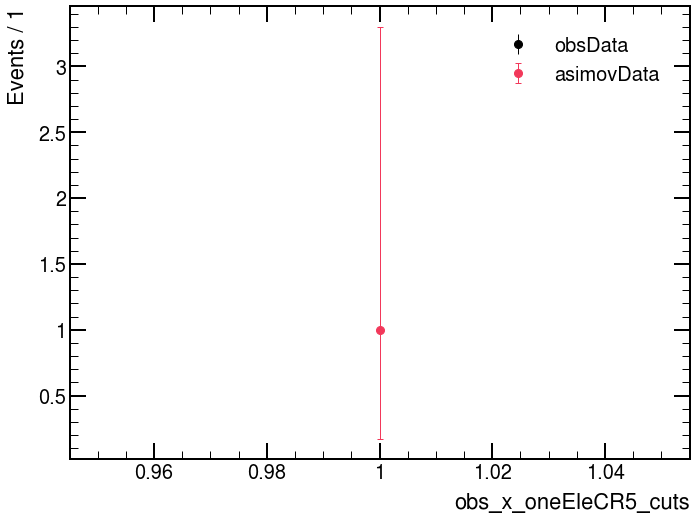

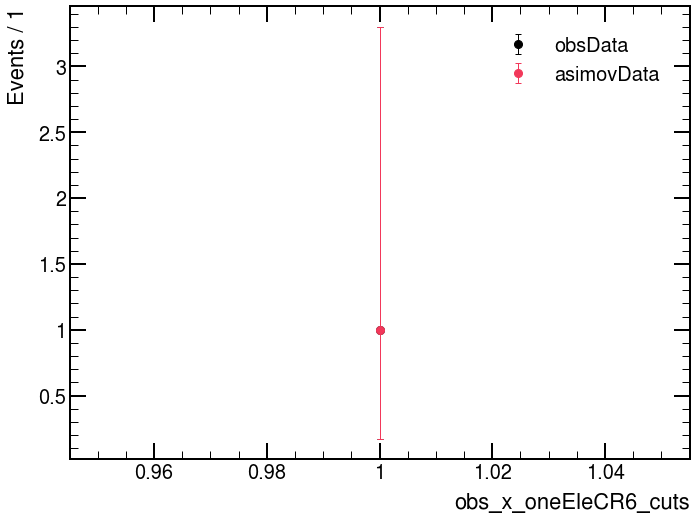

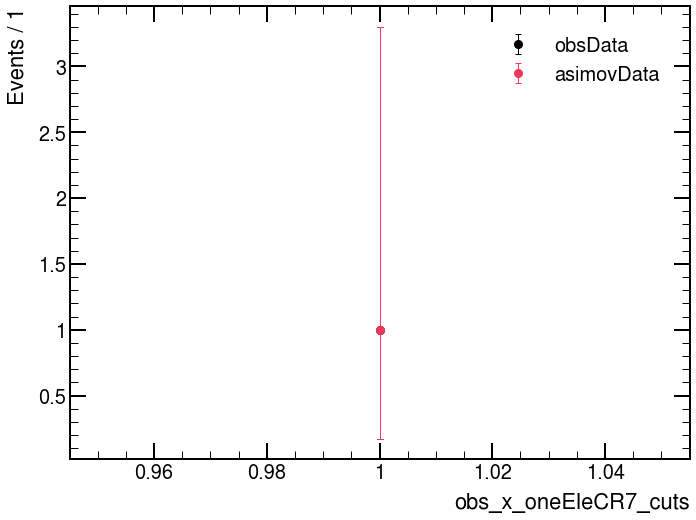

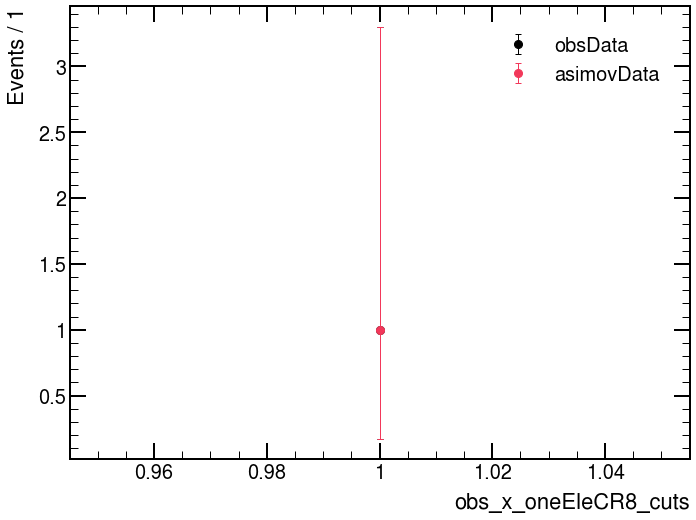

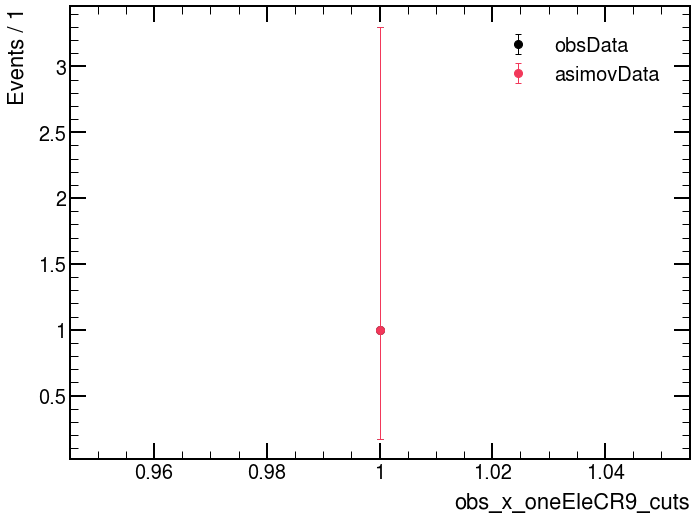

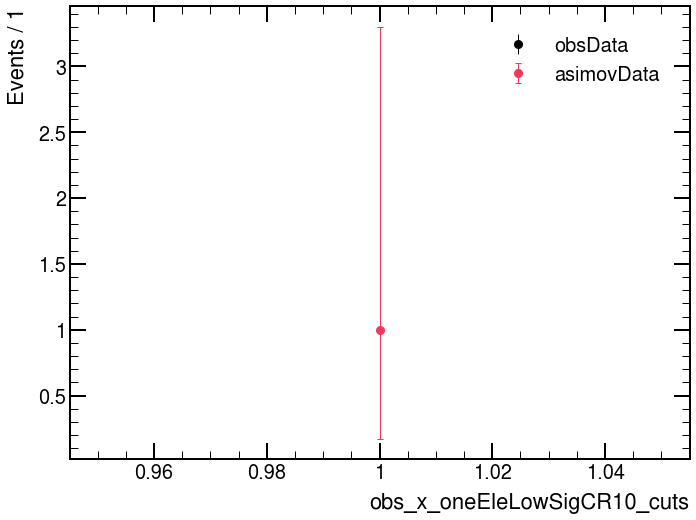

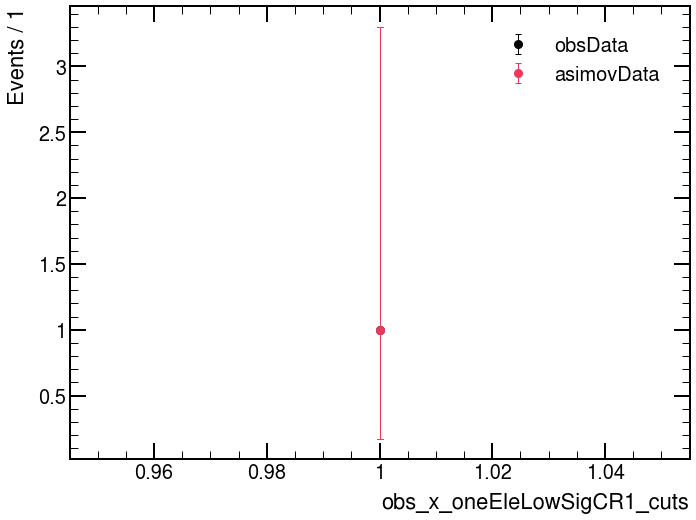

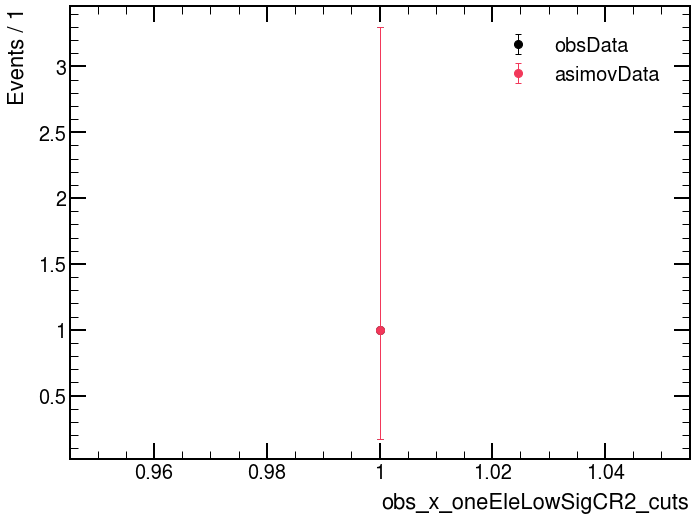

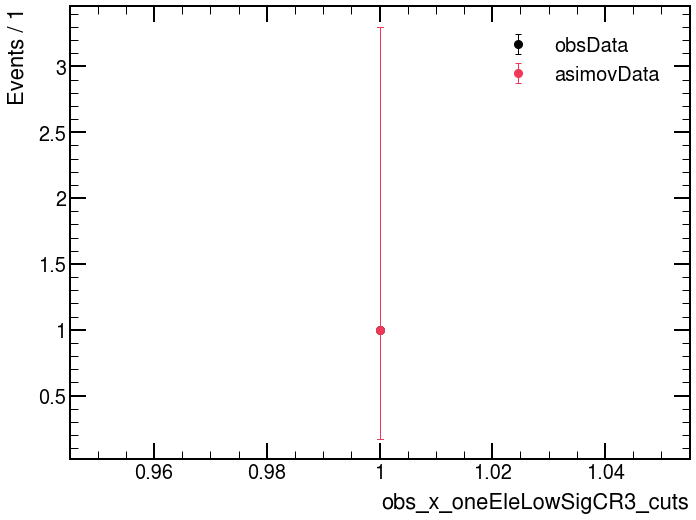

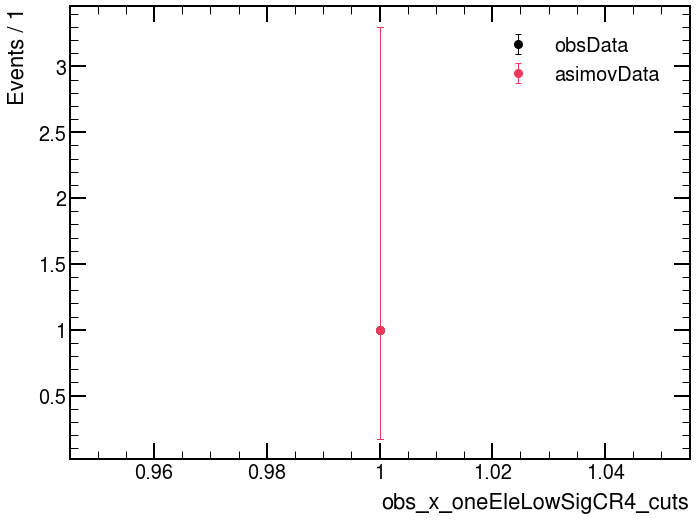

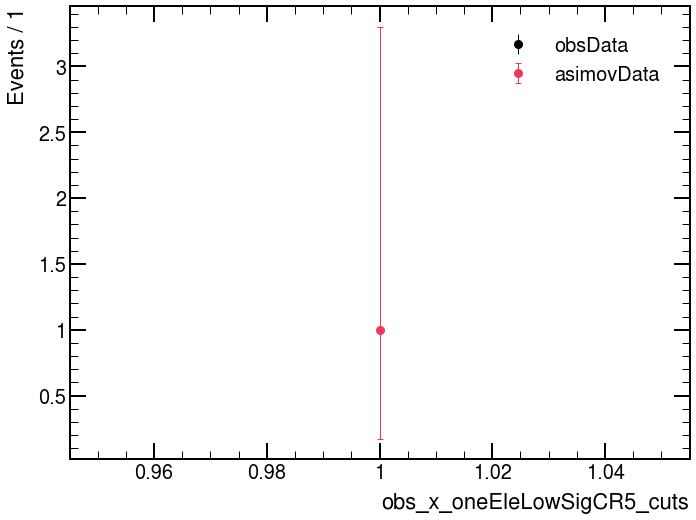

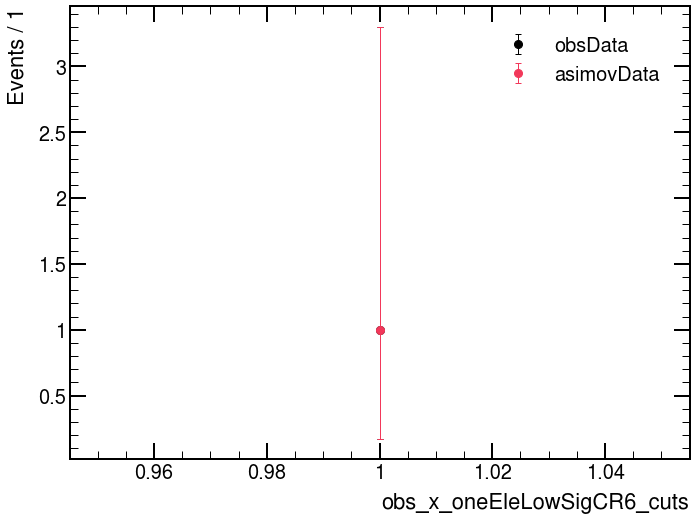

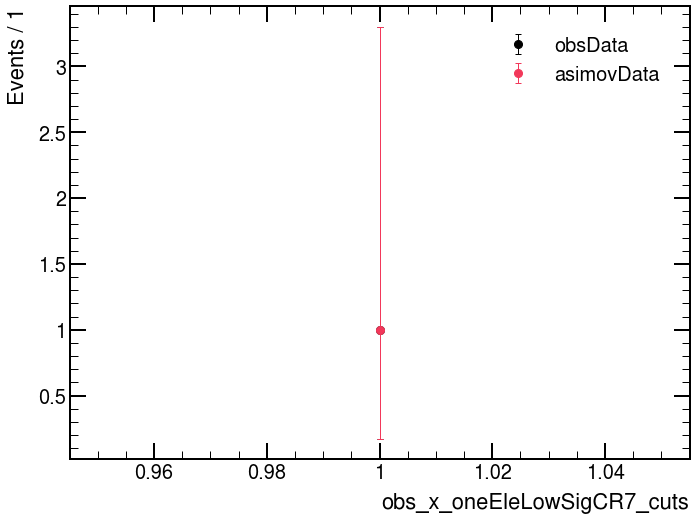

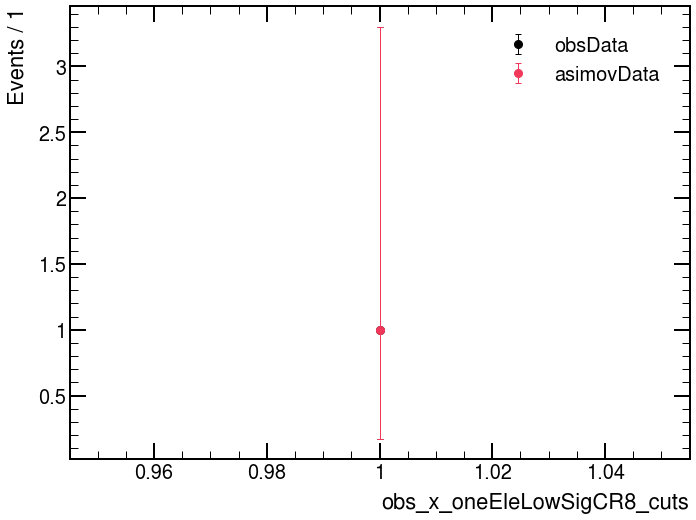

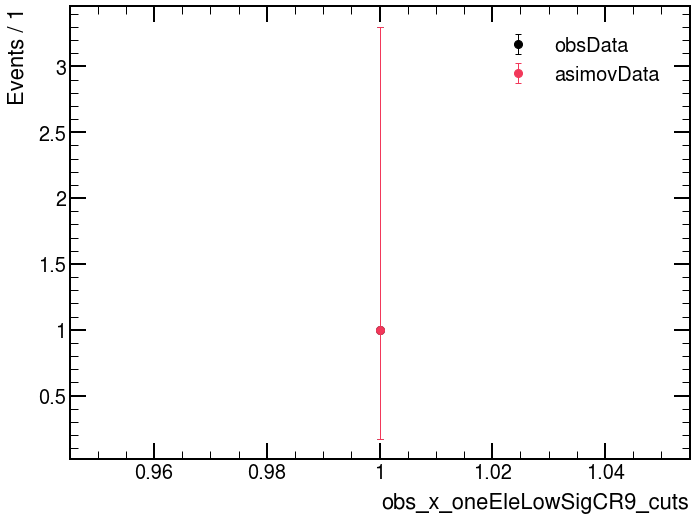

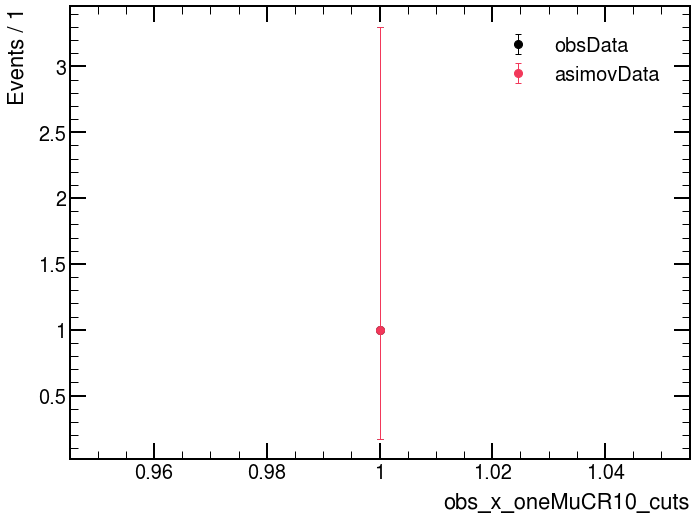

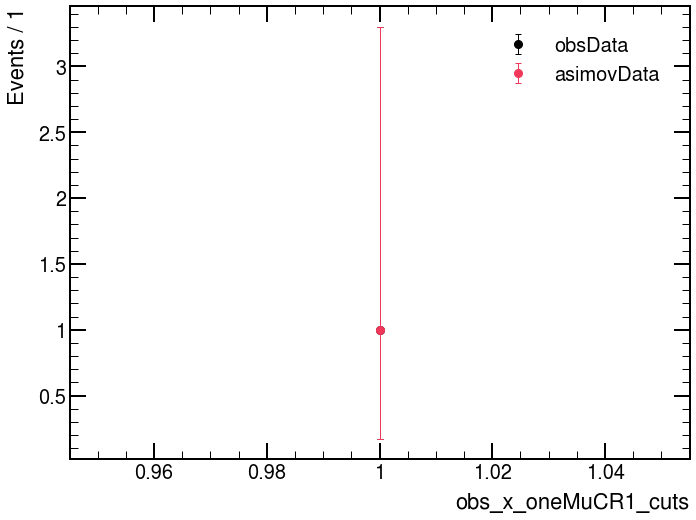

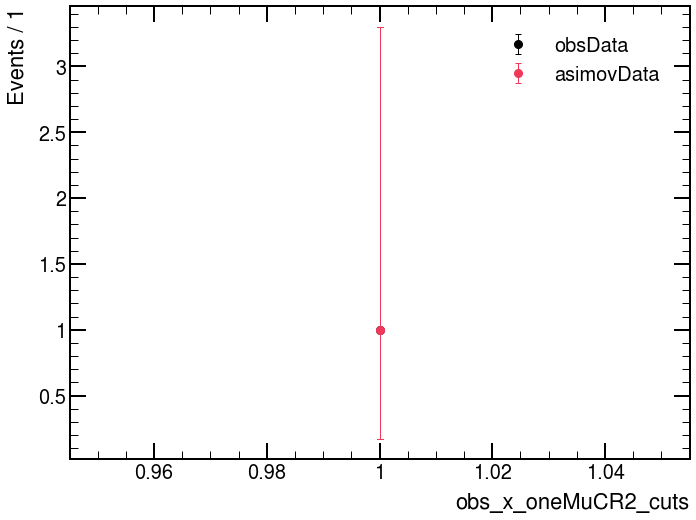

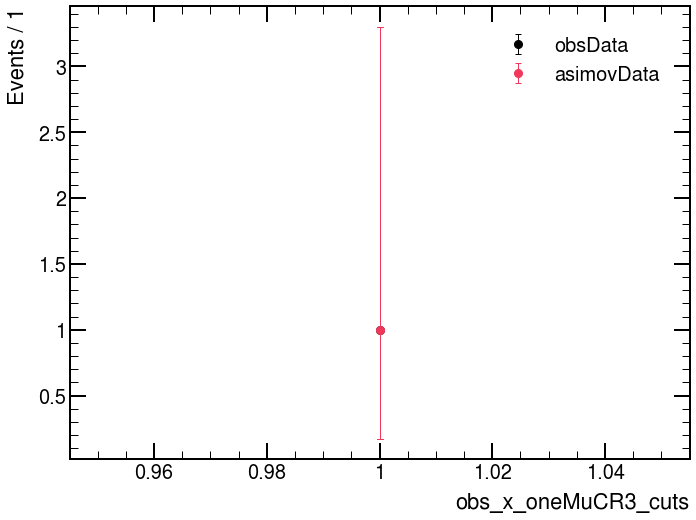

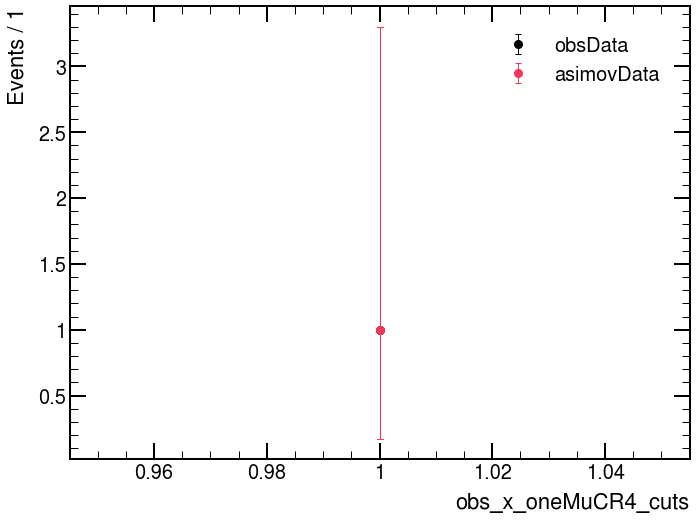

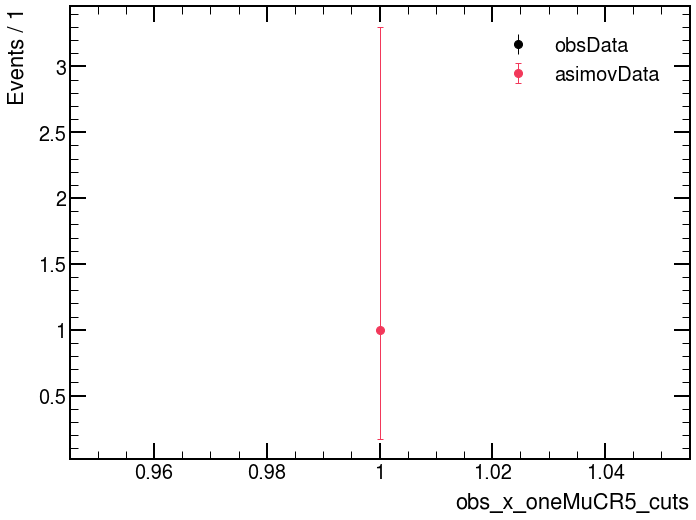

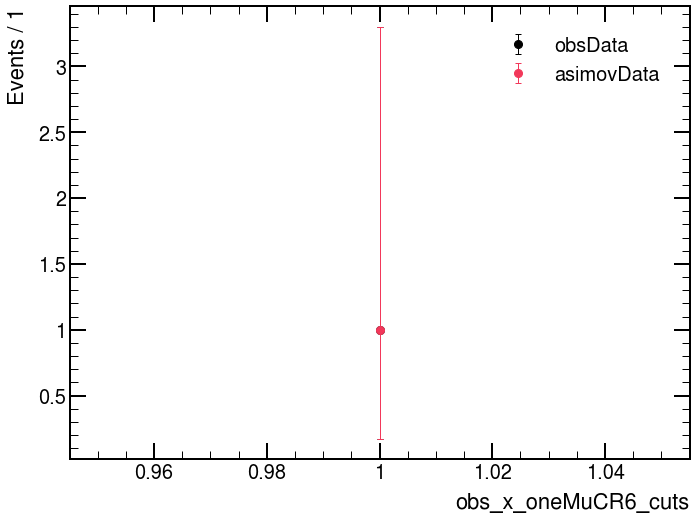

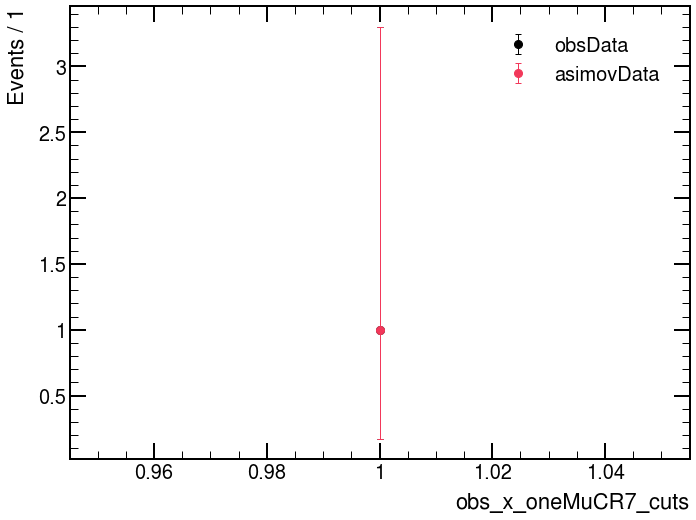

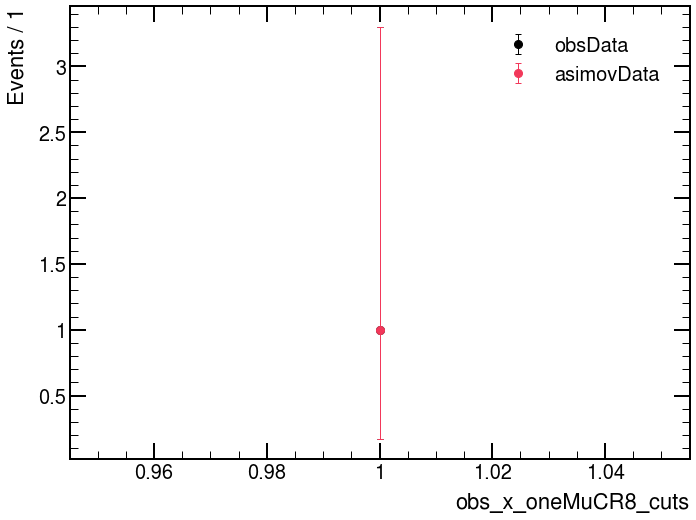

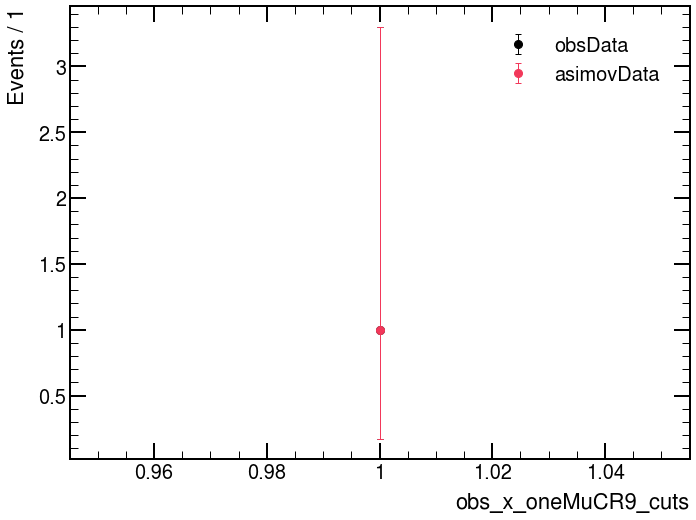

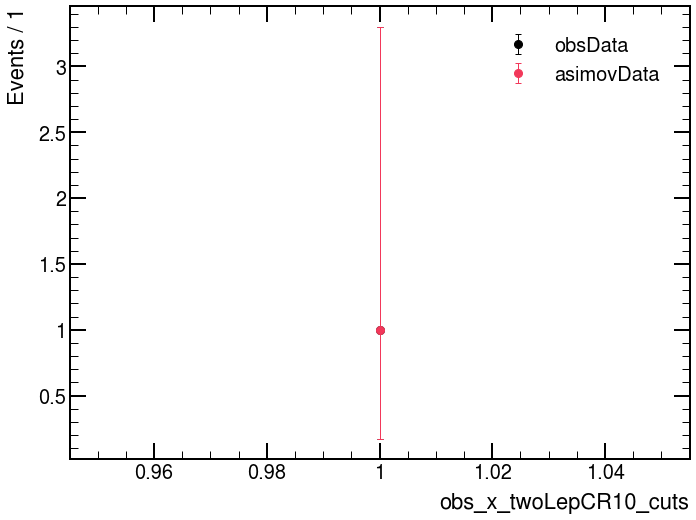

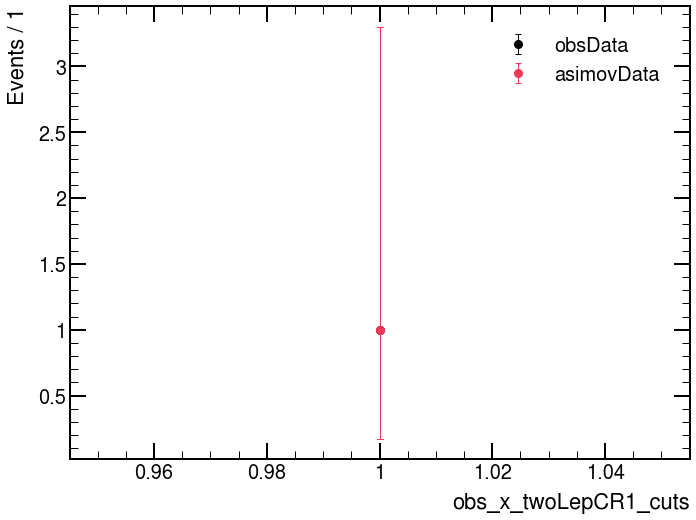

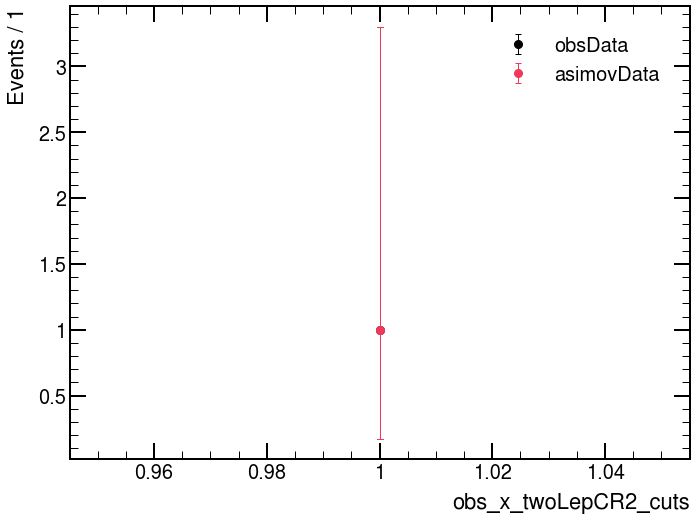

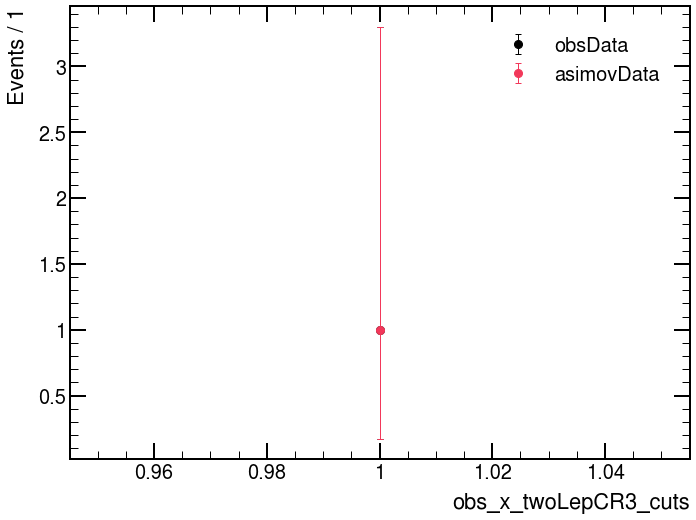

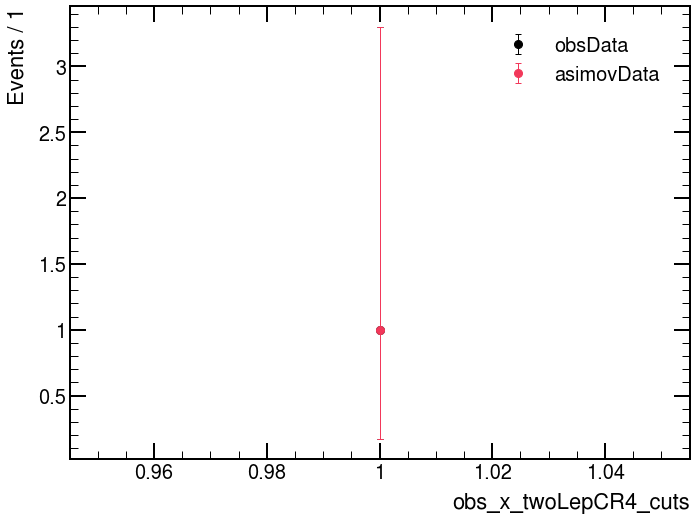

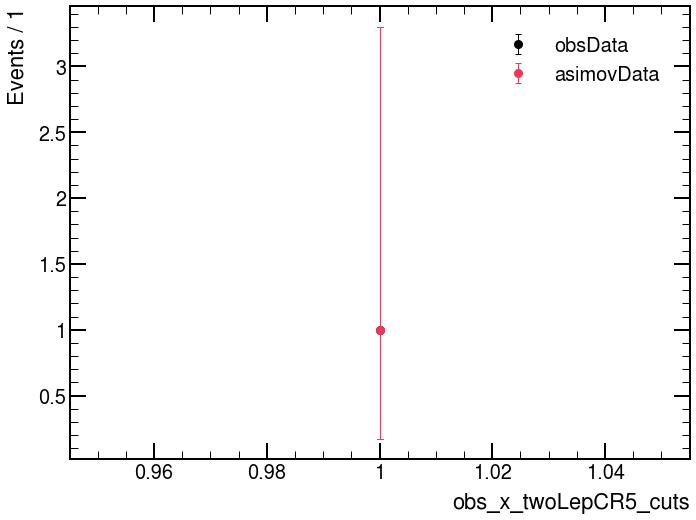

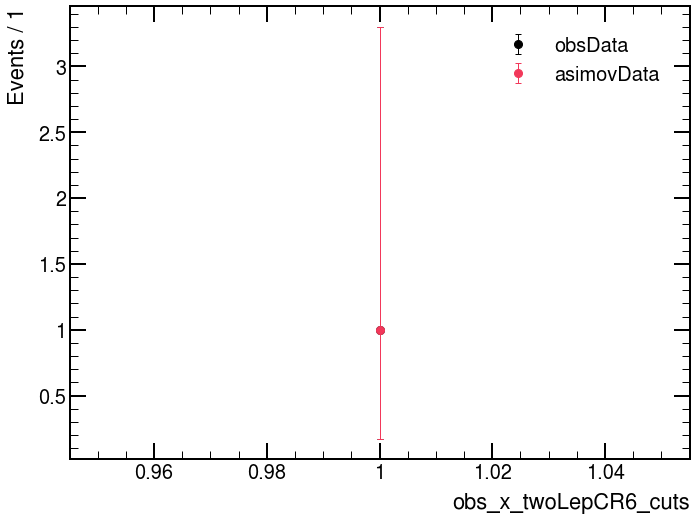

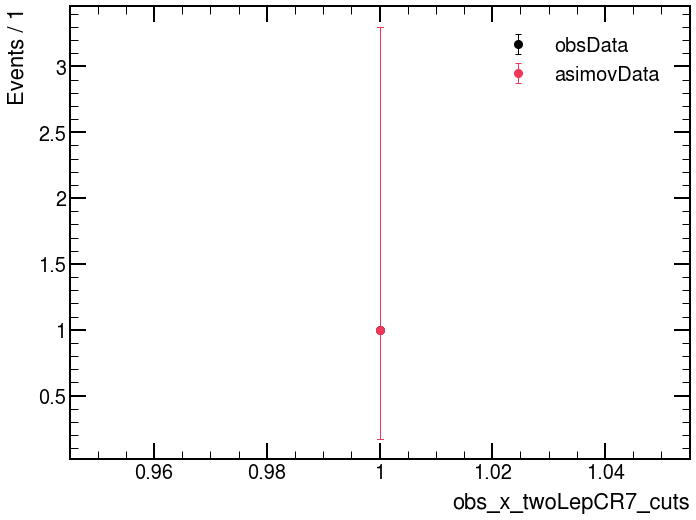

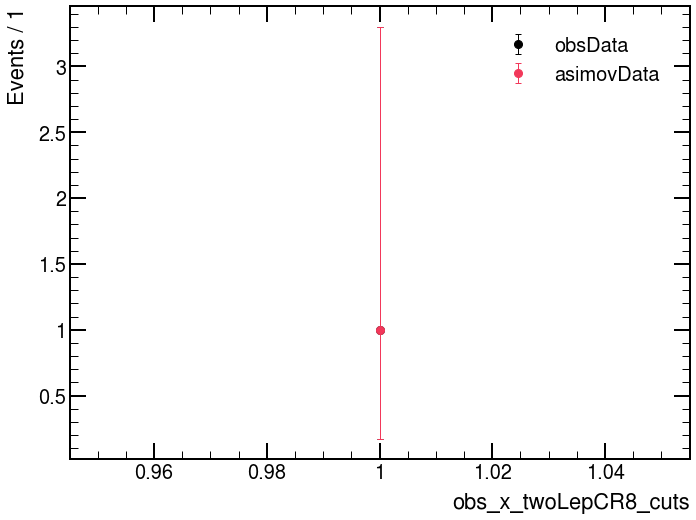

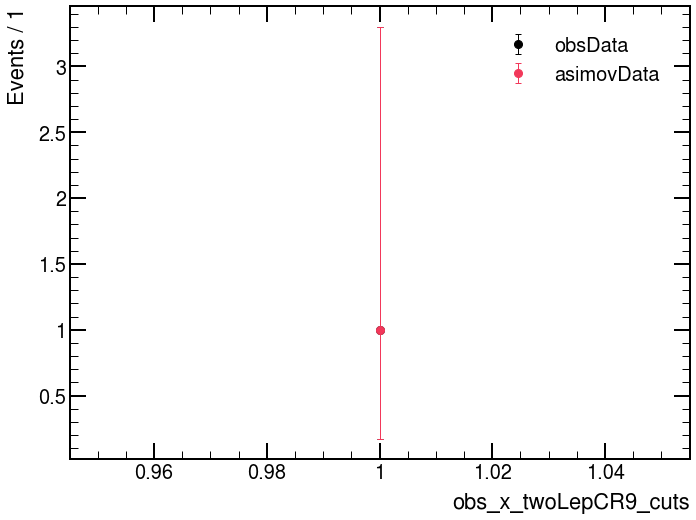

In [38]:
model.pois
model.plot_distributions(current_distributions=False, datasets=['obsData', 'asimovData'])


In [36]:
model.get_dataset_distributions(model.workspace.data('obsData'))

{'SR10_cuts': {'observable': 'obs_x_SR10_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR1_cuts': {'observable': 'obs_x_SR1_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR2_cuts': {'observable': 'obs_x_SR2_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR3_cuts': {'observable': 'obs_x_SR3_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR4_cuts': {'observable': 'obs_x_SR4_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR5_cuts': {'observable': 'obs_x_SR5_cuts',
  'x': array([1.]),
  'y': array([1.]),
  'yerrlo': array([0.82724622]),
  'yerrhi': array([2.29952656])},
 'SR6_cuts': {'observable': 'obs_x_SR6_cuts',
  'x': array([1.]),
  'y': array([